
Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x))

1.Определить корни

2.Найти интервалы, на которых функция возрастает

3.Найти интервалы, на которых функция убывает

4.Построить график

5.Вычислить вершину

6.Определить промежутки, на котором f > 0

7.Определить промежутки, на котором f < 0

In [1]:
from sympy.abc import x
from sympy import *
from sympy.calculus.util import maximum

y = trigsimp(((sin(x)/2) + (cos(x)/2)) ** 2 * sin(x))
y

sin(x)*sin(x + pi/4)**2/2

1. Определить корни.

In [2]:
x_when_y_null = solveset(y, x)
x_when_y_null

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Обозначения при выводе корней (для ориентира по записи корней): ∪ - объединение множеств: множество, содержащее в себе все элементы исходных множеств; ℤ — множество целых чисел. Оно состоит из натуральных чисел, им противоположных и нуля.

Из решения шага (поиск корней) выше следует, что период функции равен 2𝜋, для дальнейших шагов будем использовать минимальный положительный период [0; 2𝜋], т.к. далее все, что мы найдем, будет повторяться с шагом в 2𝜋. Корни на минимальном положительном периоде от 0 до 2𝜋: 0, 𝜋, 3𝜋/4, 7𝜋/4, 2𝜋

2. Найти интервалы, на которых функция возрастает.

In [3]:
x_when_diff_y_null_in_period = sorted(solveset(diff(y, x), x, domain=Interval(0, 2*pi)))
# x_when_y_null_in_period - список из координат x, в которых y' = 0 (y' - производная) 
# на отрезке минимального положительного периода, в этих точках будут точки экстремума (перегиба в графике)
div_arr = []
# div_arr будет списком из разниц между координатами x, в которых y' = 0
for i in range(0, len(x_when_diff_y_null_in_period)):
    div = x_when_diff_y_null_in_period[i] - x_when_diff_y_null_in_period[i-1]
    div_arr.append(div)
min_div = min(div_arr)
min_div
# min_div - значение минимума из списка разниц списка между элементами div_arr (для последующего использования);
# min_div используется для того, чтобы не выйти за пределы интервала между элементами x_when_diff_y_null_in_period
for i in range(1, 100):
    if 1 / (10 ** i) < min_div:
        div = 1 / (10 ** i)
        break
# div - такая разница, которая меньше минимальной разницы между элементами списка div_arr
for i in range(0, len(x_when_diff_y_null_in_period)):
    if y.subs(x, x_when_diff_y_null_in_period[i]) > y.subs(x, x_when_diff_y_null_in_period[i] + div):
        print(f'Функция возрастает на отрезке: [{x_when_diff_y_null_in_period[i-1]}; {x_when_diff_y_null_in_period[i]}]\n')
    else:
        continue

Функция возрастает на отрезке: [-I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)**2)) + I*(-atan(sin(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)/cos(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)) + 2*pi)); -I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2)) - I*atan(cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)/sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)))]

Функция возрастает на отрезке: [3*pi/4; -I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan

3. Найти интервалы, на которых функция убывает.

In [4]:
for i in range(0, len(x_when_diff_y_null_in_period)):
    if y.subs(x, x_when_diff_y_null_in_period[i]) < y.subs(x, x_when_diff_y_null_in_period[i] + div):
        print(f'Функция убывает на отрезке: [{x_when_diff_y_null_in_period[i-1]}; {x_when_diff_y_null_in_period[i]}]\n')
    else:
        continue
        

Функция убывает на отрезке: [-I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2)) - I*atan(cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)/sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2))); 3*pi/4]

Функция убывает на отрезке: [-I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)**2)) + I*(pi - atan(sin(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)/cos(atan(-1/(1 + sqrt(17)) + sqrt(17)/(1 + sqrt(17)))/2)))); -I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(sqrt(17)/

4. Построить график.

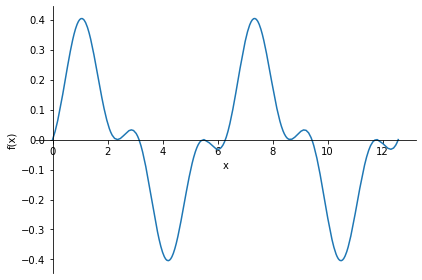

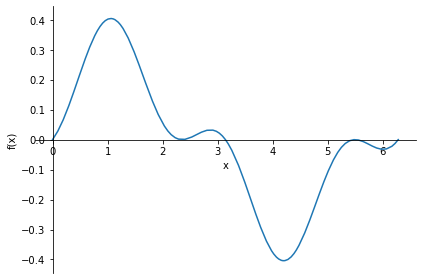

In [5]:
graph_double = plot(y, (x, 0, 4*pi)) # график на двойном минимальном положительном периоде 
graph_min = plot(y, (x, 0, 2*pi)) # график на минимальном положительном периоде 

5. Вычислить вершину.

In [6]:
max_min = solveset(diff(y, x), x, domain=Interval(0, 2*pi))
max_min = list(max_min)
y_arr = []
x_arr = []
for i in range(0, len(max_min)):
    x_arr.append(max_min[i])
    y_arr.append(y.subs(x, max_min[i]))
max_y_index = y_arr.index(max(y_arr))
print('Вершина (точка с максимальным значением по y) в пределах минимального положительного периода имеет координаты:\n')
print(f'x-координата: {x_arr[max_y_index]}\n')
print(f'y-координата: {y_arr[max_y_index]}\n')


Вершина (точка с максимальным значением по y) в пределах минимального положительного периода имеет координаты:

x-координата: -I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2)) - I*atan(cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)/sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)))

y-координата: -sin(I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2)) - I*atan(cos(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)/sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2))))*cos(I*(log(sqrt(sqrt((1/6 - sqrt(17)/6)**2 + (1/6 + sqrt(17)/6)**2)*sin(atan(sqrt(17)/(1 - sqrt(17)) + 1/(1 - sqrt(17)))/2)**2 + s

6. Определить промежутки, на котором f > 0.

In [7]:
solve_univariate_inequality(y > 0, x, relational=False, domain=Interval(0, 2*pi))

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

Ответ: на промежутке минимального положительного периода [0; 2𝜋] функция положительная при x > 0 и x < 𝜋, исключая точку x = 3𝜋/4. Точка x = 3𝜋/4 исключена из решения, т.к. эта точка - один из корней уравнения f(x) = 0.

7. Определить промежутки, на котором f < 0.

In [8]:

solve_univariate_inequality(y < 0, x, relational=False, domain=Interval(0, 2*pi))

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))

Ответ: на промежутке минимального положительного периода [0; 2𝜋] функция отрицательная при x > 𝜋 и x < 2𝜋, исключая точку x = 7𝜋/4. Точка x = 7𝜋/4 исключена из решения, т.к. эта точка - один из корней уравнения f(x) = 0.